In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Filter tissue specific networks using metric defined in Sonawane et al 2017

A TF->gene edge is specific to tissue (t) if $s_{ij}^{(t)} > 2$,

$s_{ij}^{(t)} = \frac{w_{ij}^{(t)} - med(w_{ij}^{(all)})}{IQR(w_{ij}^{(all)}}$

where $w_{ij}^{(t)}$ is the edge weight in tissue (t) and $w_{ij}^{(all)}$ is the distribution of the edge weight across all tissues

In [2]:
results_path = "/scratch/mblab/jungw/human_TF_project/data/xgboost_all_gtex_tissues/results/"
tissues = np.loadtxt("/scratch/mblab/jungw/human_TF_project/data/xgboost_all_gtex_tissues/tissues.txt", dtype=str)

## 1. load all tissue networks

In [4]:
df_list = []
for tissue in tissues:
    metanet_path = os.path.join(results_path, tissue, "METANet", "xgboost", f"{tissue}_xgboost.tsv")
    df = pd.read_csv(metanet_path, sep="\t", header=None, names=['TF','GENE','SCORE'])
    df['tissue'] = tissue
    df_list.append(df)
df = pd.concat(df_list)
df

,TF,GENE,SCORE,tissue
0,ENSG00000160199.14,ENSG00000211445.11,0.252937,adipose_subcutaneous
1,ENSG00000169981.10,ENSG00000142534.6,0.251222,adipose_subcutaneous
2,ENSG00000141510.17,ENSG00000075624.14,0.249252,adipose_subcutaneous
3,ENSG00000162702.7,ENSG00000164692.17,0.249014,adipose_subcutaneous
4,ENSG00000109320.11,ENSG00000137801.10,0.248649,adipose_subcutaneous
...,...,...,...,...
2317233,ENSG00000197905.8,ENSG00000144426.18,0.041436,whole_blood
2317234,ENSG00000245848.2,ENSG00000144642.21,0.041435,whole_blood
2317235,ENSG00000118513.18,ENSG00000151835.15,0.040390,whole_blood
2317236,ENSG00000123405.13,ENSG00000136542.8,0.040084,whole_blood


### pivot to EDGE (row) by TISSUE (column)

In [6]:
df['EDGE'] = df['TF'] + '-' + df['GENE']
df = df.drop(columns=['TF','GENE'])
df_wide = df.pivot(columns=['tissue'], index=['EDGE'], values=['SCORE'])
df_wide

SCORE  \
tissue                                adipose_subcutaneous   
EDGE                                                         
ENSG00000001167.14-ENSG00000000003.14             0.073199   
ENSG00000001167.14-ENSG00000000005.5              0.085010   
ENSG00000001167.14-ENSG00000000419.12             0.083885   
ENSG00000001167.14-ENSG00000000457.13             0.074097   
ENSG00000001167.14-ENSG00000000460.16             0.068995   
...                                                    ...   
ENSG00000278129.1-ENSG00000280789.1               0.093848   
ENSG00000278129.1-ENSG00000282608.1               0.071692   
ENSG00000278129.1-ENSG00000283154.2               0.068730   
ENSG00000278129.1-ENSG00000283597.2                    NaN   
ENSG00000278129.1-ENSG00000284770.1               0.092611   

                                                                             \
tissue                                adipose_visceral_omentum artery_aorta   
EDGE                                                                          
ENSG00000001167.14-ENSG00000000003.14                 0.075577     0.075896   
ENSG00000001167.14-ENSG00000000005.5                  0.082191          NaN   
ENSG00000001167.14-ENSG00000000419.12                 0.080063     0.068867   
ENSG00000001167.14-ENSG00000000457.13                 0.057244     0.062091   
ENSG00000001167.14-ENSG00000000460.16                 0.062154     0.125233   
...                                                        ...          ...   
ENSG00000278129.1-ENSG00000280789.1                   0.095924     0.098406   
ENSG00000278129.1-ENSG00000282608.1                   0.081276     0.081466   
ENSG00000278129.1-ENSG00000283154.2                        NaN          NaN   
ENSG00000278129.1-ENSG00000283597.2                        NaN          NaN   
ENSG00000278129.1-ENSG00000284770.1                   0.087146     0.085851   

                                                                     \
tissue                                artery_coronary artery_tibial   
EDGE                                                                  
ENSG00000001167.14-ENSG00000000003.14        0.079254      0.067629   
ENSG00000001167.14-ENSG00000000005.5         0.079205      0.072998   
ENSG00000001167.14-ENSG00000000419.12        0.084546      0.084184   
ENSG00000001167.14-ENSG00000000457.13        0.063192      0.061785   
ENSG00000001167.14-ENSG00000000460.16        0.067618      0.135396   
...                                               ...           ...   
ENSG00000278129.1-ENSG00000280789.1          0.103090      0.094371   
ENSG00000278129.1-ENSG00000282608.1               NaN      0.072442   
ENSG00000278129.1-ENSG00000283154.2               NaN      0.072823   
ENSG00000278129.1-ENSG00000283597.2               NaN           NaN   
ENSG00000278129.1-ENSG00000284770.1          0.086977      0.084576   

                                                      \
tissue                                brain_amygdala   
EDGE                                                   
ENSG00000001167.14-ENSG00000000003.14       0.067255   
ENSG00000001167.14-ENSG00000000005.5             NaN   
ENSG00000001167.14-ENSG00000000419.12       0.098943   
ENSG00000001167.14-ENSG00000000457.13       0.061894   
ENSG00000001167.14-ENSG00000000460.16       0.060153   
...                                              ...   
ENSG00000278129.1-ENSG00000280789.1         0.090601   
ENSG00000278129.1-ENSG00000282608.1         0.087809   
ENSG00000278129.1-ENSG00000283154.2         0.071219   
ENSG00000278129.1-ENSG00000283597.2              NaN   
ENSG00000278129.1-ENSG00000284770.1         0.097650   

                                                                   \
tissue                                brain_caudate_basal_ganglia   
EDGE                                                                
ENSG00000001167.14-ENSG00000000003.14                    0.073392   
ENSG00000001167.14-EN

## 2. find set of edges shared across tissues

This is because some edges are missing in some tissues (TF set and gene set are not the same across tissues due to data availability). 

> Decide on whether to (1) drop edges not present in all 36 tissues, (2) drop edges present in less than $X$ number of tissues
>
> arbitarily pick $X = 12$ (as it is 1/3 of tissues)

Text(0.5, 0, 'tissue membership count')

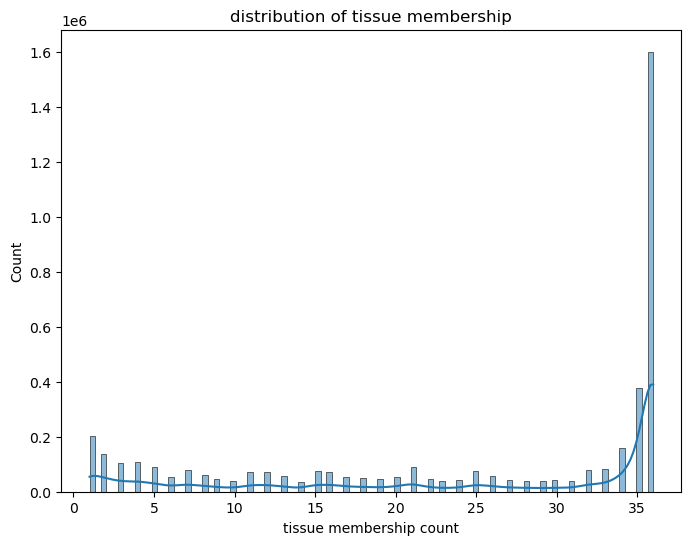

In [7]:
tissue_counts = df_wide.notna().sum(axis=1)
tissue_counts
plt.figure(figsize=(8,6))
sns.histplot(tissue_counts, bins=100, kde=True)
plt.title("distribution of tissue membership")
plt.xlabel("tissue membership count")

In [8]:
select_edges = tissue_counts[tissue_counts >= 12].index
df_wide = df_wide.loc[select_edges,]
df_wide

SCORE  \
tissue                                adipose_subcutaneous   
EDGE                                                         
ENSG00000001167.14-ENSG00000000003.14             0.073199   
ENSG00000001167.14-ENSG00000000419.12             0.083885   
ENSG00000001167.14-ENSG00000000457.13             0.074097   
ENSG00000001167.14-ENSG00000000460.16             0.068995   
ENSG00000001167.14-ENSG00000000938.12             0.133079   
...                                                    ...   
ENSG00000278129.1-ENSG00000280165.1               0.060828   
ENSG00000278129.1-ENSG00000280789.1               0.093848   
ENSG00000278129.1-ENSG00000282608.1               0.071692   
ENSG00000278129.1-ENSG00000283154.2               0.068730   
ENSG00000278129.1-ENSG00000284770.1               0.092611   

                                                                             \
tissue                                adipose_visceral_omentum artery_aorta   
EDGE                                                                          
ENSG00000001167.14-ENSG00000000003.14                 0.075577     0.075896   
ENSG00000001167.14-ENSG00000000419.12                 0.080063     0.068867   
ENSG00000001167.14-ENSG00000000457.13                 0.057244     0.062091   
ENSG00000001167.14-ENSG00000000460.16                 0.062154     0.125233   
ENSG00000001167.14-ENSG00000000938.12                 0.121162     0.081430   
...                                                        ...          ...   
ENSG00000278129.1-ENSG00000280165.1                   0.063888     0.072395   
ENSG00000278129.1-ENSG00000280789.1                   0.095924     0.098406   
ENSG00000278129.1-ENSG00000282608.1                   0.081276     0.081466   
ENSG00000278129.1-ENSG00000283154.2                        NaN          NaN   
ENSG00000278129.1-ENSG00000284770.1                   0.087146     0.085851   

                                                                     \
tissue                                artery_coronary artery_tibial   
EDGE                                                                  
ENSG00000001167.14-ENSG00000000003.14        0.079254      0.067629   
ENSG00000001167.14-ENSG00000000419.12        0.084546      0.084184   
ENSG00000001167.14-ENSG00000000457.13        0.063192      0.061785   
ENSG00000001167.14-ENSG00000000460.16        0.067618      0.135396   
ENSG00000001167.14-ENSG00000000938.12        0.080813      0.079148   
...                                               ...           ...   
ENSG00000278129.1-ENSG00000280165.1               NaN      0.063310   
ENSG00000278129.1-ENSG00000280789.1          0.103090      0.094371   
ENSG00000278129.1-ENSG00000282608.1               NaN      0.072442   
ENSG00000278129.1-ENSG00000283154.2               NaN      0.072823   
ENSG00000278129.1-ENSG00000284770.1          0.086977      0.084576   

                                                      \
tissue                                brain_amygdala   
EDGE                                                   
ENSG00000001167.14-ENSG00000000003.14       0.067255   
ENSG00000001167.14-ENSG00000000419.12       0.098943   
ENSG00000001167.14-ENSG00000000457.13       0.061894   
ENSG00000001167.14-ENSG00000000460.16       0.060153   
ENSG00000001167.14-ENSG00000000938.12       0.088537   
...                                              ...   
ENSG00000278129.1-ENSG00000280165.1         0.058819   
ENSG00000278129.1-ENSG00000280789.1         0.090601   
ENSG00000278129.1-ENSG00000282608.1         0.087809   
ENSG00000278129.1-ENSG00000283154.2         0.071219   
ENSG00000278129.1-ENSG00000284770.1         0.097650   

                                                                   \
tissue                                brain_caudate_basal_ganglia   
EDGE                                                                
ENSG00000001167.14-ENSG00000000003.14                    0.073392   
ENSG00000001167.14-EN

# 3. Calculate tissue specific label assignment

In [9]:
# 1. calculate median
edge_medians = df_wide.median(axis=1, skipna=True)
edge_IQRs = df_wide.quantile(0.75, axis=1) - df_wide.quantile(0.25, axis=1)

# 2. 
median_matrix = pd.DataFrame({col: edge_medians for col in df_wide.columns})
iqr_matrix = pd.DataFrame({col: edge_IQRs for col in df_wide.columns})

# 3. compute s(i,j)^(t)
s_scores = (df_wide - median_matrix) / iqr_matrix

# 4. Define boolean mask for tissue-specific edges
specific_mask = s_scores > 2

### export tissue specific networks

In [10]:
for tissue in df_wide.columns:
    # get tissue mask
    tissue_mask = specific_mask[tissue]
    tissue_name = tissue[1] if isinstance(tissue, tuple) else tissue
    print(tissue_name)

    # subset original edge weights for specific edges
    df_tissue_specific = df_wide.loc[tissue_mask, [tissue]]

    # edge -> tissue and gene
    df_tissue_specific = df_tissue_specific.reset_index()
    df_tissue_specific['TF'] = df_tissue_specific['EDGE'].str.split('-', expand=True)[0]
    df_tissue_specific['GENE'] = df_tissue_specific['EDGE'].str.split('-', expand=True)[1]
    df_tissue_specific = df_tissue_specific[['TF','GENE','SCORE']]

    # save
    output_path = os.path.join(results_path, tissue_name, "METANet", "xgboost_specific")
    # os.makedirs(output_path, exist_ok=True)
    # df_tissue_specific.to_csv(os.path.join(output_path, f"{tissue_name}_xgboost_specific.tsv"), sep="\t", index=False, header=False)
    

adipose_subcutaneous
adipose_visceral_omentum
artery_aorta
artery_coronary
artery_tibial
brain_amygdala
brain_caudate_basal_ganglia
brain_cerebellum
brain_cortex
brain_hippocampus
brain_nucleus_accumbens_basal_ganglia
brain_putamen_basal_ganglia
brain_spinal_cord_cervical_c-1
brain_substantia_nigra
breast_mammary_tissue
colon_transverse
esophagus_mucosa
esophagus_muscularis
heart_left_ventricle
liver
lung
muscle_skeletal
nerve_tibial
ovary
pancreas
pituitary
prostate
skin_sun_exposed_lower_leg
small_intestine_terminal_ileum
spleen
stomach
testis
thyroid
uterus
vagina
whole_blood


# compare network characteristics between tissue-specific METANets vs tissue-specific PANDA

In [11]:
tissues = np.loadtxt("/scratch/mblab/jungw/human_TF_project/data/xgboost_all_gtex_tissues/tissues_panda_metanet_overlap.txt", dtype=str)

df_list = []
for tissue in tissues:
    print(tissue)
    metanet_tissue_path = os.path.join(results_path, tissue, "METANet", "xgboost_specific", f"{tissue}_xgboost_specific.tsv")
    df_metanet = pd.read_csv(metanet_tissue_path, sep="\t", header=None, names=['TF','GENE','SCORE'])
    metanet_n_tfs = df_metanet['TF'].nunique()
    metanet_n_genes = df_metanet['GENE'].nunique()
    metanet_n_edges = len(df_metanet)
    row = {
        'Number of TFs': metanet_n_tfs,
        'Number of genes': metanet_n_genes,
        'Number of edges': metanet_n_edges,
        'Network': 'METANets',
        'Tissue': tissue
    }
    df_list.append(row)

    panda_tissue_path = os.path.join(results_path, tissue, "benchmark_networks", "panda_tissue_specific", f"{tissue}_panda_tissue_specific_stableID.tsv")
    df_panda = pd.read_csv(panda_tissue_path, sep="\t", header=None, names=['TF','GENE','SCORE'])
    panda_n_tfs = df_panda['TF'].nunique()
    panda_n_genes = df_panda['GENE'].nunique()
    panda_n_edges = len(df_panda)
    row = {
        'Number of TFs': panda_n_tfs,
        'Number of genes': panda_n_genes,
        'Number of edges': panda_n_edges,
        'Network': 'PANDA',
        'Tissue': tissue
    }
    df_list.append(row)

df = pd.DataFrame(df_list)
df

adipose_subcutaneous
adipose_visceral_omentum
artery_aorta
artery_coronary
artery_tibial
brain_cerebellum
breast_mammary_tissue
colon_transverse
esophagus_mucosa
esophagus_muscularis
heart_left_ventricle
liver
lung
muscle_skeletal
nerve_tibial
ovary
pancreas
pituitary
prostate
spleen
stomach
testis
thyroid
uterus
vagina
whole_blood


,Number of TFs,Number of genes,Number of edges,Network,Tissue
0,240,7526,28778,METANets,adipose_subcutaneous
1,217,1277,4717,PANDA,adipose_subcutaneous
2,236,7228,27241,METANets,adipose_visceral_omentum
3,215,5822,33641,PANDA,adipose_visceral_omentum
4,233,8201,33841,METANets,artery_aorta
5,205,650,2201,PANDA,artery_aorta
6,237,6590,21262,METANets,artery_coronary
7,210,1358,5539,PANDA,artery_coronary
8,227,8772,45943,METANets,artery_tibial
9,205,2990,21790,PANDA,artery_tibial


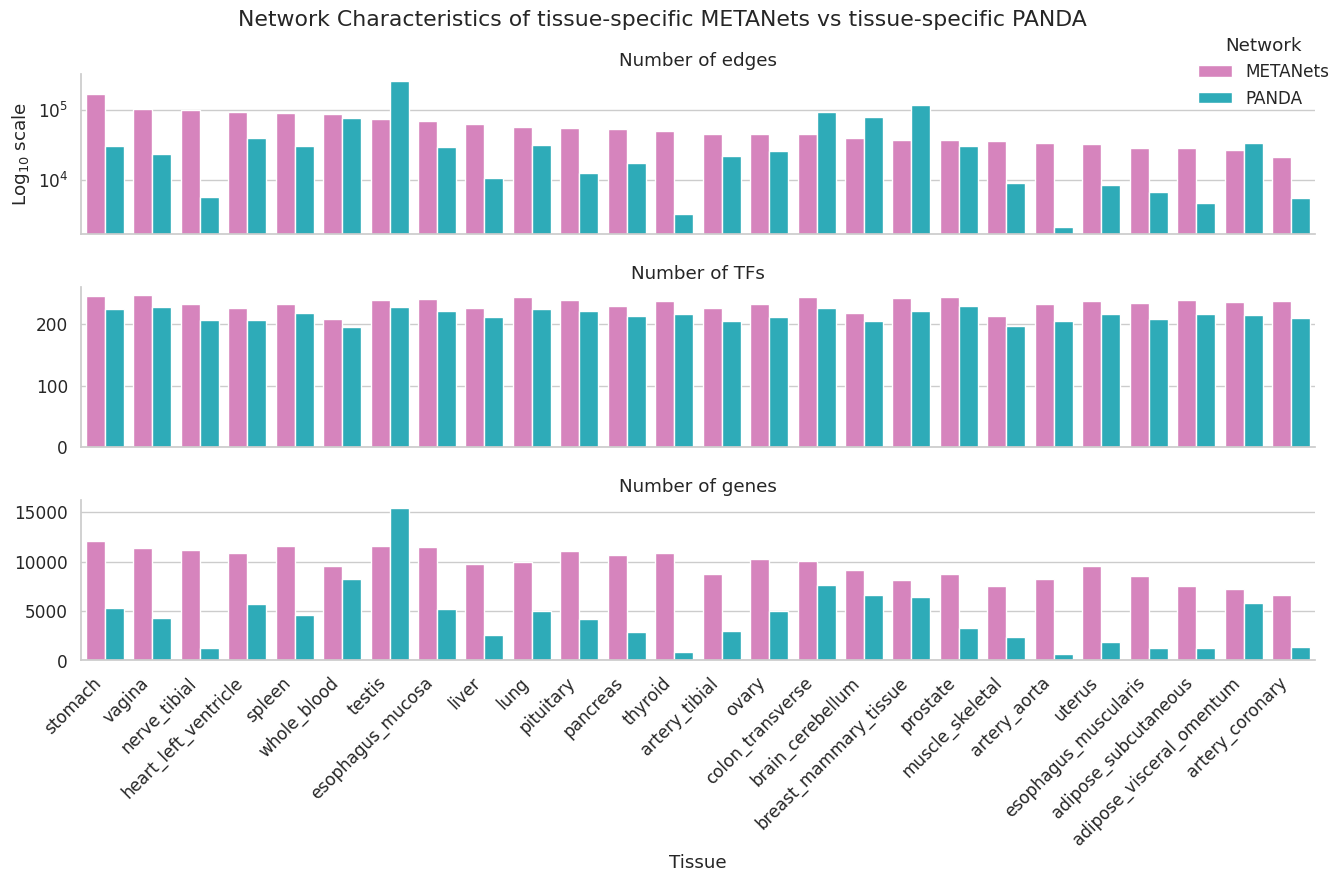

In [12]:
df_edges_sorted = df[df["Network"] == "METANets"].sort_values("Number of edges", ascending=False)
tissue_order = df_edges_sorted["Tissue"].tolist()

# Ensure tissue column is a categorical with correct order
df["Tissue"] = pd.Categorical(df["Tissue"], categories=tissue_order, ordered=True)

# Melt dataframe to long format
df_long = df.melt(
    id_vars=["Network", "Tissue"],
    value_vars=["Number of edges", "Number of TFs", "Number of genes"],
    var_name="metric",
    value_name="count"
)

# Enforce custom metric order
metric_order = ["Number of edges", "Number of TFs", "Number of genes"]
df_long["metric"] = pd.Categorical(df_long["metric"], categories=metric_order, ordered=True)

# Custom colors for networks
palette = {"METANets": "tab:pink", "PANDA": "tab:cyan"}

# Set plot style
sns.set(style="whitegrid", font_scale=1.1)

# Create the FacetGrid
g = sns.catplot(
    data=df_long,
    x="Tissue",
    y="count",
    hue="Network",
    col="metric",
    col_order=metric_order,
    kind="bar",
    col_wrap=1,         # vertical stack
    height=3,
    aspect=4,
    sharex=True,
    sharey=False,
    palette=palette,
    legend_out=True
)

# Format axis labels
for i, ax in enumerate(g.axes.flat):

    
    if i < len(g.axes.flat) - 1:
        ax.set_xticklabels([])
        ax.set_xlabel("")
    else:
        ax.set_xticks(range(len(tissue_order)))
        ax.set_xticklabels(tissue_order, rotation=45, ha="right")
        ax.set_xlabel("Tissue")
    ax.set_ylabel("")
    if i == 0:
        ax.set_yscale('log')
        ax.set_ylabel(r"$\text{Log}_{10}$ scale")

# Titles and spacing
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9, bottom=0.25)  # Add bottom margin for ticks
g.fig.suptitle("Network Characteristics of tissue-specific METANets vs tissue-specific PANDA")
g._legend.set_bbox_to_anchor((1.0, 0.9))  # Top-right corner of figure

plt.tight_layout()
# plt.savefig("/scratch/mblab/jungw/human_TF_project/manuscript_figures/supplemental/tissue_specific_metanet_panda_network_characteristics_barplots.svg", format="svg", dpi=300)